# 2020 Kaggle Machine Learning & Data Science Survey Analysis

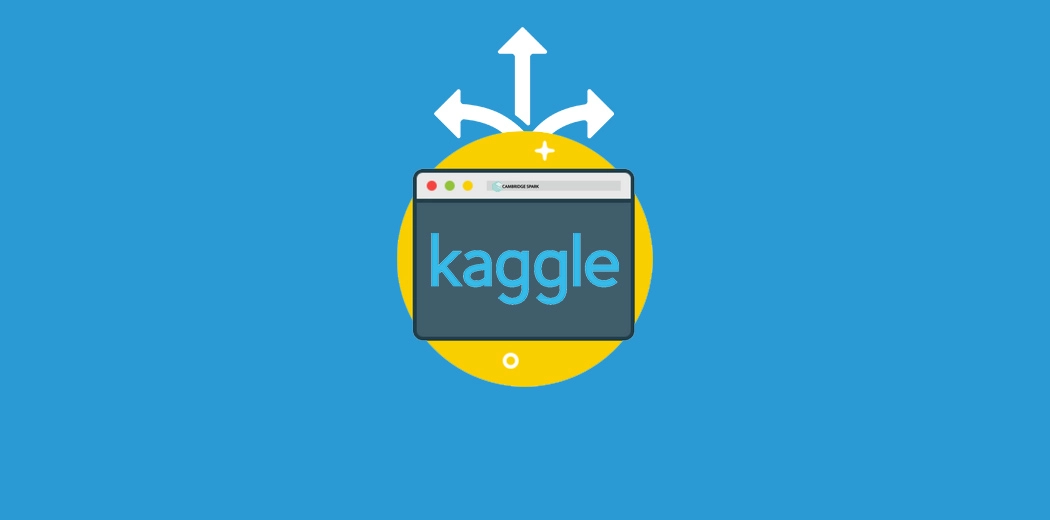

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objects as go
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install pywaffle

In [ ]:
from pywaffle import Waffle

In [ ]:
dataset = pd.read_csv('../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv')
dataset.drop([0], inplace=True)

In [ ]:
data_country=dataset.groupby('Q3')[['Q1']].count()
data_country.rename(columns={"Q1": "count"},inplace=True)
data_country.reset_index(inplace=True)
data_country=data_country[data_country['count']>400].sort_values('count',ascending=False)

f, ax = plt.subplots(figsize=(20, 9))
sns.barplot(data=data_country,x='count',y="Q3",color="yellow",label="countries",orient="h")
plt.title('Residence countrie', fontsize=30)
plt.xlabel('COUNT', fontsize=25)
plt.ylabel('COUNTRIES', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


The highest number of people participating in this survey are from India at around 5.5k

In [ ]:
vizdata = dataset.loc[1:, ["Q4"]].dropna()

vizdata = pd.DataFrame(vizdata.value_counts(normalize=True)).reset_index()

vizdata_dict = dict(zip(vizdata['Q4'],vizdata[0]*100))
labels = ['{} {:.1f}%'.format(k, v) for k, v in vizdata_dict.items()]

fig = plt.figure(
    FigureClass=Waffle,
    rows=6,
    title=dict(label='Education level',loc='left',size=7, color='orange'),
    figsize=(5,4),
    values=vizdata_dict,
    labels=labels,
    legend = {
        'loc': 'lower left',
        'bbox_to_anchor': (0, -0.4),
        'ncol': 3,
        'framealpha': 0,
        'fontsize': 4
    },
    icons='user', 
    icon_size=9,
    icon_legend=True,
    dpi=350,
    block_arranging_style='new-line',
    interval_ratio_x=0.3,
    interval_ratio_y=0.4
    
)

plt.show()

We can observe that a majority of the people either possess a Master's degree or a Bachelor's degree. They account for around 75% for the total number of people who took the survey.

To get more insight on the dataset we will take these two factors namely people having a master's degree and people having a bachelor's degree.

In [ ]:
dataset = pd.read_csv('../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv', skiprows=1)
masters = dataset[dataset['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?']=="Master’s degree"]
bachelors = dataset[dataset['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?']=="Bachelor’s degree"]

count_m = masters['What is your age (# years)?'].value_counts()[:8].reset_index()
count_b = bachelors['What is your age (# years)?'].value_counts()[:8].reset_index()

pie_masters = go.Pie(labels=count_m['index'],values=count_m['What is your age (# years)?'],name="Masters",hole=0.4,domain={'x': [0,0.46]})

pie_bachelors = go.Pie(labels=count_b['index'],values=count_b['What is your age (# years)?'],name="Bachelors",hole=0.5,domain={'x': [0.52,0.98]})

layout = dict(title = 'Age group', font=dict(size=10), legend=dict(orientation="h"),
              annotations = [dict(x=0.18, y=0.5, text="Masters", showarrow=False, font=dict(size=20)),
                             dict(x=0.81, y=0.5, text="Bachelors", showarrow=False, font=dict(size=20)) ])

fig = dict(data=[pie_masters, pie_bachelors], layout=layout)
py.iplot(fig)

Here we can see that most of the people with a master's' degree are from the age group 25-29, whereas for a bachelors degree the prominent age group is 18-21. A majority of masters degree holders are in the group of 22 to 34 which accounts to more than 60%. Furthermore of bachelors the majority is seen in the ages from 18 to 29 which include more than 70% of them.

In [ ]:
count_mast = masters['In which country do you currently reside?'].value_counts()[:6].reset_index()
count_bach = bachelors['In which country do you currently reside?'].value_counts()[:6].reset_index()

pie_masters = go.Pie(labels=count_mast['index'],values=count_mast['In which country do you currently reside?'],name="Masters",hole=0.4,domain={'x': [0,0.46]})

pie_bachelors = go.Pie(labels=count_bach['index'],values=count_bach['In which country do you currently reside?'],name="Bachelors",hole=0.5,domain={'x': [0.52,0.98]})

layout = dict(title = 'Masters and Bachelors in various countries', font=dict(size=10), legend=dict(orientation="h"),
              annotations = [dict(x=0.18, y=0.5, text='Masters', showarrow=False, font=dict(size=20)),
                             dict(x=0.81, y=0.5, text='Bachelors', showarrow=False, font=dict(size=20)) ])

fig = dict(data=[pie_masters, pie_bachelors], layout=layout)
py.iplot(fig)

A majority of people that either hold a master's or a bachelor's degree are from India followed by United States of America. We can see a pattern in most countries that the number of people with masters degree is greater than people with a bachelors degree. But this is not the case for India as the number of bachelors degree holders are way more than masters degree holders. The highest number of masters and bachelors degree holders are from India with more than 60% of bachelors degree holders coming from India and more than 40% for masters.

In [ ]:
count_mast = masters['Select the title most similar to your current role (or most recent title if retired): - Selected Choice'].value_counts()[:7].reset_index()
count_bach = bachelors['Select the title most similar to your current role (or most recent title if retired): - Selected Choice'].value_counts()[:7].reset_index()

pie_masters = go.Pie(labels=count_mast['index'],values=count_mast['Select the title most similar to your current role (or most recent title if retired): - Selected Choice'],name="Masters",hole=0.4,domain={'x': [0,0.46]})

pie_bachelors = go.Pie(labels=count_bach['index'],values=count_bach['Select the title most similar to your current role (or most recent title if retired): - Selected Choice'],name="Bachelors",hole=0.5,domain={'x': [0.52,0.98]})

layout = dict(title = 'Current role', font=dict(size=10), legend=dict(orientation="h"),
              annotations = [dict(x=0.18, y=0.5, text='Masters', showarrow=False, font=dict(size=20)),
                             dict(x=0.81, y=0.5, text='Bachelors', showarrow=False, font=dict(size=20)) ])

fig = dict(data=[pie_masters, pie_bachelors], layout=layout)
py.iplot(fig)

So a majority of bachelors that is more than 40% are currently students and for masters it is more than 20%. People with a masters degree are employed as a data scientist whereas people with a bachelors degree are working as software engineers. We can see that people with a masters degree are generally preferred for the role of data scientist as there are double the number of data scientists that hold a masters degree over a bachelors degree.

In [ ]:
progBasis = dataset.iloc[:,7:20]
progBasis.columns =  ['language1','language2','language3','language4','language5','language6','language7','language8','language9','language10','language11','language12','language13']
python = progBasis['language1'].value_counts()
R = progBasis['language2'].value_counts()
SQL = progBasis['language3'].value_counts()
C = progBasis['language4'].value_counts()
Cplus = progBasis['language5'].value_counts()
java = progBasis['language6'].value_counts()
javascript = progBasis['language7'].value_counts()
julia = progBasis['language8'].value_counts()
swift = progBasis['language9'].value_counts()
bash = progBasis['language10'].value_counts()
matlab = progBasis['language11'].value_counts()
none = progBasis['language12'].value_counts()
other = progBasis['language13'].value_counts()
#concat Dataframes
progBasis = pd.concat([python,R,SQL,C,Cplus,java,javascript,julia,swift,bash,matlab])
progBasis.index.names = ['Programming_Languages']

fig = px.bar(progBasis, x=progBasis, y=progBasis.index, color=progBasis.index, orientation='h',
             height=500)
fig.update_layout(title="Programming Languages used on a daily basis",
                  xaxis_title="Count",
                  yaxis_title='Programming Languages')
fig.show()

Out of 21k people that took the survey 15k people use python on a daily basis. They account for around 75% of the total number of people that took the survey. SQL and R are the next most used languages on a daily basis after python with 7.5k and 4.2k people respectivel

In [ ]:
dataQ8 = dataset['What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice'].sort_index().value_counts().sort_values(ascending = True)

fig = px.bar(x= dataQ8, y=dataQ8.index,title="Various Languages suggested", orientation='h', labels={'x':'Total Answers','y':'Language'})
            
fig.show()

The most commonly suggested language is python with around 14k people followed by R and SQL with 1.2k and 849 users. Python seems like the go to language for anyone planning to start a career in data science.

In [ ]:
count_mast = masters['What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice'].value_counts()[:7].reset_index()
count_bach = bachelors['What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice'].value_counts()[:7].reset_index()

pie_masters = go.Pie(labels=count_mast['index'],values=count_mast['What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice'],name="Masters",hole=0.4,domain={'x': [0,0.46]})

pie_bachelors = go.Pie(labels=count_bach['index'],values=count_bach['What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice'],name="Bachelors",hole=0.5,domain={'x': [0.52,0.98]})

layout = dict(title = 'Suggested Language', font=dict(size=15), legend=dict(orientation="h"),
              annotations = [dict(x=0.18, y=0.5, text='Masters', showarrow=False, font=dict(size=20)),
                             dict(x=0.81, y=0.5, text='Bachelors', showarrow=False, font=dict(size=20)) ])

fig = dict(data=[pie_masters, pie_bachelors], layout=layout)
py.iplot(fig)

There is always an issue whenever we try to learn something new 'where do we start?'. So the community has answered and python came out on top with a large majority voting for python followed by R and SQL. There always was this conflict whether we should learn R or python when starting out but according to the survey now python is a must have. By lookingat the charts above we can say that different education level people suggest python to an aspiring data scientist. The number of R and SQL suggestions are a bit higher for people with a masters degree.

In [ ]:
dataQ8 = dataset['For how many years have you been writing code and/or programming?'].sort_index().value_counts().sort_values(ascending = True)

fig = px.bar(x= dataQ8, y=dataQ8.index,title="Programming Experience", orientation='h', labels={'x':'Total Answers','y':'Range'})
            
fig.show()

A majority can be seen in people with experience between 1 or less than 1 to 5 years. They account for 50% of the people that took the survey. A lot of the younger generations are interested in data science and have just started out their career in the field.

In [ ]:
count_mast = masters['For how many years have you been writing code and/or programming?'].value_counts()[:7].reset_index()
count_bach = bachelors['For how many years have you been writing code and/or programming?'].value_counts()[:7].reset_index()

pie_masters = go.Pie(labels=count_mast['index'],values=count_mast['For how many years have you been writing code and/or programming?'],name="Masters",hole=0.4,domain={'x': [0,0.46]})

pie_bachelors = go.Pie(labels=count_bach['index'],values=count_bach['For how many years have you been writing code and/or programming?'],name="Bachelors",hole=0.5,domain={'x': [0.52,0.98]})

layout = dict(title = 'Experience writing code', font=dict(size=15), legend=dict(orientation="h"),
              annotations = [dict(x=0.18, y=0.5, text='Masters', showarrow=False, font=dict(size=20)),
                             dict(x=0.81, y=0.5, text='Bachelors', showarrow=False, font=dict(size=20)) ])

fig = dict(data=[pie_masters, pie_bachelors], layout=layout)
py.iplot(fig)

Most people with masters degree have programming experience of 3 to 5 years whereas people with bachelors degree are between 1 to 2 years. There are very few bachelors with experience above 5 years as compared to masters. The majority of people that hold a masters degree are between the 1 to 10 year experience range. In case of bachelors a majority is seen between 0 to 5 years

Now the next question arises how much experience do they have in using machine learning methods.

In [ ]:
dataQ15 = dataset['For how many years have you used machine learning methods?'].sort_index().value_counts().sort_values(ascending = True)

fig = px.bar(x= dataQ15, y=dataQ15.index,title="Machine Learning experience", orientation='h', labels={'x':'Total Answers','y':'Range'})
            
fig.show()

In [ ]:
count_m = masters['For how many years have you used machine learning methods?'].value_counts()[:8].reset_index()
count_b = bachelors['For how many years have you used machine learning methods?'].value_counts()[:8].reset_index()

pie_masters = go.Pie(labels=count_m['index'],values=count_m['For how many years have you used machine learning methods?'],name="Masters",hole=0.4,domain={'x': [0,0.46]})

pie_bachelors = go.Pie(labels=count_b['index'],values=count_b['For how many years have you used machine learning methods?'],name="Bachelors",hole=0.5,domain={'x': [0.52,0.98]})

layout = dict(title = 'Machine learning Experience', font=dict(size=10), legend=dict(orientation="h"),
              annotations = [dict(x=0.18, y=0.5, text="Masters", showarrow=False, font=dict(size=20)),
                             dict(x=0.81, y=0.5, text="Bachelors", showarrow=False, font=dict(size=20)) ])

fig = dict(data=[pie_masters, pie_bachelors], layout=layout)
py.iplot(fig)

Almsot 50% of bachelors have less than 1 year experience with machine leaning methods whereas 33% of masters have less than 1 year of experience with machine learning methods. But the number of masters with experience between 1-3 years is higher than people with a bachelors degree. A similar trend is seen that people with masters degree have a higher experience as compared to bachelors.

In [ ]:
df_IDE = dataset.iloc[1:,21:33]

IDE_col = ['Jupyter','RStudio','Visual Studio','Visual Studio Code', 'PyCharm', 'Spyder','Notepad++','Sublime Text','Vim / Emacs',
           'MATLAB','None','Other']

df_IDE.columns = IDE_col
df_IDE = df_IDE.count().sort_values(ascending = True)

fig = px.bar(x= df_IDE, y=df_IDE.index,title="Most Used Environments (IDE's)",
             orientation='h',
             labels={'x':'Total Answers','y':'IDEs'})

            
fig.show()

There are many different Integrated Development Environments but jupyter is the preferred one followed by visual studio code. Though other IDEs also have a considerable number of users.

In [ ]:
df_frame = dataset.iloc[1:,66:82]

frame_col = ['Scikit-learn','TensorFlow','Keras','PyTorch', 'Fast.ai', 'MXNet','Xgboost','LightGBM','CatBoost','Prophet','H2O 3','Caret',
           'Tidymodels','JAX','None','Other']

df_frame.columns = frame_col
df_frame = df_frame.count().sort_values(ascending = False)


fig = px.bar(y= df_frame, x=df_frame.index,title="Most Used Machine Learning Frameworks",
             orientation='v',
             labels={'y':'Total Answers','x':'Frameworks '})


            
fig.show()

Scikit-learn is the most commonly used machine learning framework followed by tensorflow and keras which are mainly used for deep learning just like pytorch.

In [ ]:
dataQ17 = dataset.iloc[1:,82:94]

ML_col = ['Linear or Logistic Regression','Random Forests','Gradient Boosting','Bayesian Approaches', 'Evolutionary Approaches', 
          'Dense Neural Networks','CNN','Generative Adversarial Networks','RNN','Transformer Networks','None','Other']

dataQ17.columns = ML_col
dataQ17 = dataQ17.count().sort_values(ascending = False)

fig = px.bar(y= dataQ17, x=dataQ17.index,title="Most Used Machine Learning Algorithms",
             orientation='v', 
             labels={'y':'Total Answers','x':'Algorithms '})


            
fig.show()

Linear and Logistic regression came out on top with more than 10k users followed by random forest. CNN and gradient boosting were also one of the top picks by the community followed after regression and random forest.

In [ ]:
count_m = masters['What is the size of the company where you are employed?'].value_counts()[:8].reset_index()
count_b = bachelors['What is the size of the company where you are employed?'].value_counts()[:8].reset_index()

pie_masters = go.Pie(labels=count_m['index'],values=count_m['What is the size of the company where you are employed?'],name="Masters",hole=0.4,domain={'x': [0,0.46]})

pie_bachelors = go.Pie(labels=count_b['index'],values=count_b['What is the size of the company where you are employed?'],name="Bachelors",hole=0.5,domain={'x': [0.52,0.98]})

layout = dict(title = 'Size of Company', font=dict(size=10), legend=dict(orientation="h"),
              annotations = [dict(x=0.18, y=0.5, text="Masters", showarrow=False, font=dict(size=20)),
                             dict(x=0.81, y=0.5, text="Bachelors", showarrow=False, font=dict(size=20)) ])

fig = dict(data=[pie_masters, pie_bachelors], layout=layout)
py.iplot(fig)

Here we can see alot of similarities in both the graphs. A huge number of people are working in smaller sized companies consisting of 0 to 49 employees. The number of people working for larger companies that is 10k plus people is also quite high.

Now the next question arises whether theres a difference in annual compensation between people having a masters degree and people having a bachelors degree and if so by how much.

In [ ]:
count_m = masters['What is your current yearly compensation (approximate $USD)?'].value_counts()[:8].reset_index()
count_b = bachelors['What is your current yearly compensation (approximate $USD)?'].value_counts()[:8].reset_index()

pie_masters = go.Pie(labels=count_m['index'],values=count_m['What is your current yearly compensation (approximate $USD)?'],name="Masters",hole=0.4,domain={'x': [0,0.46]})

pie_bachelors = go.Pie(labels=count_b['index'],values=count_b['What is your current yearly compensation (approximate $USD)?'],name="Bachelors",hole=0.5,domain={'x': [0.52,0.98]})

layout = dict(title = 'Annual Compensation', font=dict(size=10), legend=dict(orientation="h"),
              annotations = [dict(x=0.18, y=0.5, text="Masters", showarrow=False, font=dict(size=20)),
                             dict(x=0.81, y=0.5, text="Bachelors", showarrow=False, font=dict(size=20)) ])

fig = dict(data=[pie_masters, pie_bachelors], layout=layout)
py.iplot(fig)


As we saw there are alot of beginners in data science we can see that a majority of people have an annual salary or compensation between 0 to 999$. But for masters degree holders the number of people having annual compensation between 100k to 124k is pretty high. Having a masters degree can give u more opportunites to learn and have a higher post whereas having a bachelors degree will be a good start to your data science journey.

In [ ]:
dataQ29 = dataset.iloc[1:,155:173]

DB_col = ['MySQL','PostgresSQL','SQLite','Oracle Database', 'MongoDB', 'Snowflake','IBM Db2','Microsoft SQL Server','Microsoft Access',
          'Microsoft Azure Data Lake Storage','Amazon Redshift','Amazon Athena','Amazon DynamoDB','Google Cloud BigQuery','Google Cloud SQL',
          'Google Cloud Firestore','None','Other']

dataQ29.columns = DB_col
dataQ29 = dataQ29.count().sort_values(ascending = True)

fig = px.bar(x= dataQ29, y=dataQ29.index,title="Most Used relational databases, data warehouses, data lakes,",
             orientation='h',
             height = 700,
             labels={'y':'Total Answers','x':'DB '})

            
fig.show()

The most commonly used databases are MySQL followed by PostgresSQL and microsoft SQL server

In [ ]:
dataQ32 = dataset['Which of the following business intelligence tools do you use most often? - Selected Choice'].sort_index().value_counts().sort_values(ascending = True)

fig = px.bar(x= dataQ32, y=dataQ32.index,title="Often used Business intelligence tools", orientation='h', labels={'x':'Total Answers','y':'Range'})
            
fig.show()

Tableau, Microsoft Power BI and Google Data Studio are the most commonly used business intelligence tools. More than 70% people prefer using these tools over the others. The number of people that use these visualization tools on a general basis is also quite low. Only 30% of the people answered this question.

In [ ]:
dataQ32 = dataset['What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice'].sort_index().value_counts().sort_values(ascending = True)

fig = px.bar(x= dataQ32, y=dataQ32.index,title="Primary tool for analysing data", orientation='h', labels={'x':'Total Answers','y':'Range'})
            
fig.show()

People who took the survey often prefer to use local developtment environments like RStudio and JupyterLab. The number of people that use basic statistical software like excel and google sheets is also quite high.

In [ ]:
count_m = masters['What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice'].value_counts()[:8].reset_index()
count_b = bachelors['What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice'].value_counts()[:8].reset_index()

pie_masters = go.Pie(labels=count_m['index'],values=count_m['What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice'],name="Masters",hole=0.4,domain={'x': [0,0.46]})

pie_bachelors = go.Pie(labels=count_b['index'],values=count_b['What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice'],name="Bachelors",hole=0.5,domain={'x': [0.52,0.98]})

layout = dict(title = 'Tools used for analysing data', font=dict(size=10), legend=dict(orientation="h"),
              annotations = [dict(x=0.18, y=0.5, text="Masters", showarrow=False, font=dict(size=20)),
                             dict(x=0.81, y=0.5, text="Bachelors", showarrow=False, font=dict(size=20)) ])

fig = dict(data=[pie_masters, pie_bachelors], layout=layout)
py.iplot(fig)

Education level does not affect the use of of analysing tools as both bachelors and masters degree holders have similar numbers.